In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6306,0186-CAERR,Male,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),116.30,8309.55,No
5823,9867-NNXLC,Female,0,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,470.2,No
6374,1293-BSEUN,Female,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,20.70,1482.3,No
1493,6416-YJTTB,Male,0,No,No,11,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.50,795.65,No
6786,9820-RMCQV,Female,0,No,No,11,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Credit card (automatic),48.55,501,Yes


In [3]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [8]:
df.shape

(7043, 20)

In [9]:
df.iloc[488]['TotalCharges']

' '

In [10]:
df1 = df[df['TotalCharges']!=" "]
df1.shape

(7032, 20)

In [11]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\User\AppData\Local\Temp\ipykernel_15040\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [12]:
df1['TotalCharges'].dtype

dtype('float64')

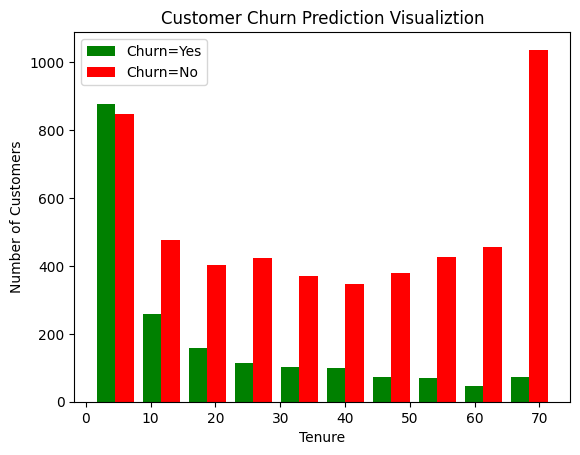

In [13]:
tenure_churn_no = df1[df1['Churn'] == "No"].tenure
tenure_churn_yes = df1[df1['Churn'] == "Yes"].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

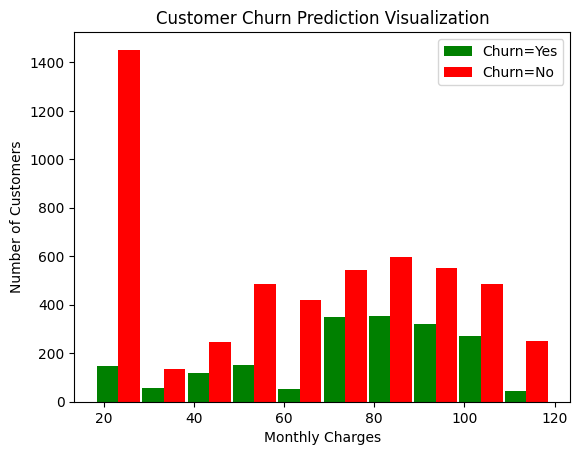

In [14]:
mc_churn_no = df1[df1['Churn']=="No"]['MonthlyCharges']
mc_churn_yes = df1[df1['Churn']=="Yes"]['MonthlyCharges']

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title("Customer Churn Prediction Visualization")

blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15040\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15040\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [18]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                'StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15040\1543698459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [20]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [21]:
df1['gender'].replace({"Female":1,"Male":0},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15040\3128987995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({"Female":1,"Male":0},inplace=True)


In [22]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [32]:
df1['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [23]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4118,1,0,0,0,40,1,0,0,1,0,...,False,True,False,True,False,False,False,True,False,False
361,1,0,0,0,41,1,0,0,1,0,...,False,True,False,False,False,True,True,False,False,False
6822,0,1,1,0,32,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False
5666,0,0,1,0,35,0,0,1,0,1,...,True,False,False,False,True,False,False,True,False,False
5026,0,0,1,1,23,1,0,0,0,0,...,False,False,True,False,True,False,False,True,False,False


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [26]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [27]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1219,1,0,1,1,0.859155,1,1,0,0,0,...,True,False,False,True,False,False,False,True,False,False
1049,1,0,0,0,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
4806,0,0,0,0,0.929577,1,0,0,0,0,...,False,False,True,False,True,False,False,False,False,True
1845,0,0,0,0,0.957746,0,0,0,1,1,...,True,False,False,False,True,False,True,False,False,False


In [28]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [29]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [31]:
X_train.shape

(5625, 26)

In [32]:
X_test.shape

(1407, 26)

In [33]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,False,True,False,True,False,False,False,True,False,False
101,1,0,1,1,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
2621,0,0,1,0,0.985915,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False
392,1,1,0,0,0.014085,1,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1327,0,0,1,0,0.816901,1,1,0,0,1,...,False,True,False,False,True,False,True,False,False,False
3607,1,0,0,0,0.169014,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2773,0,0,1,0,0.323944,0,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1936,1,0,1,0,0.704225,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
5387,0,0,0,0,0.042254,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
4331,0,0,0,0,0.985915,1,1,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [34]:
X_train = np.array(X_train).astype(float)
y_train = np.array(y_train).astype(int)

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)



Epoch 1/100


176/176 [==============================] - 2s 2ms/step - loss: 0.5166 - accuracy: 0.7410
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7936
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.8000
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.7996
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4131 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8055
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4098 - ac

In [37]:
X_test = np.array(X_test).astype(float)
y_test = np.array(y_test).astype(int)

In [38]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.7875


[0.45138639211654663, 0.7874911427497864]

In [39]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.17994633],
       [0.46932366],
       [0.00946798],
       [0.7110991 ],
       [0.7524672 ]], dtype=float32)

In [40]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [41]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_test[:10]

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [43]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [33]:
df1['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [44]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.52      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

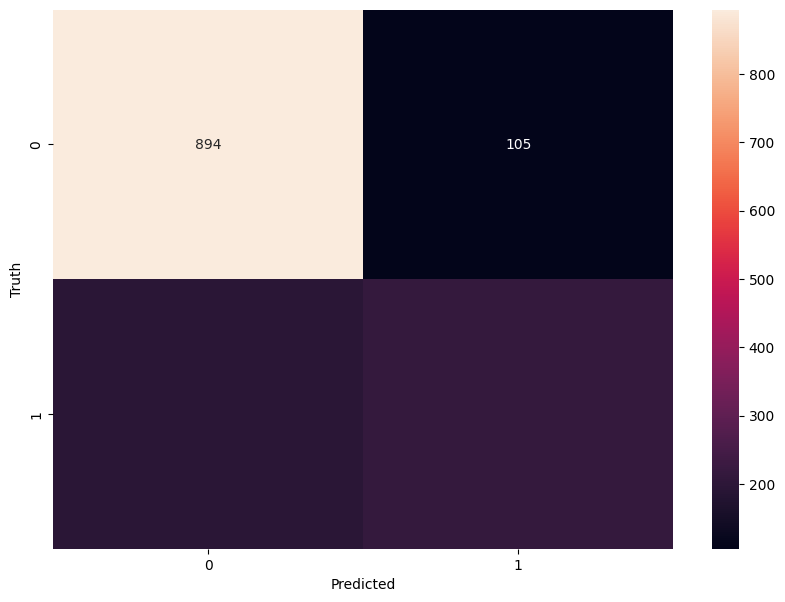

In [45]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Imbalanced Dataset

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.4966 - accuracy: 0.7586
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.7906
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7988
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 0.8071
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8057
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4056 - accura

# Method 1: Undersampling

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
count_class_0, count_class_1

(5163, 1869)

In [50]:
df_class_0.shape

(5163, 27)

In [51]:
df_class_1.shape

(1869, 27)

In [52]:
df_class_0_under = df_class_0.sample(count_class_1)

In [53]:
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [54]:
print("Random under-sampling:")
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [55]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [56]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [66]:
X_train = np.array(X_train,dtype=np.float32) # Failed to convert a NumPy array to a Tensor 
X_test = np.array(X_test,dtype=np.float32) # Failed to convert a NumPy array to a Tensor 

In [67]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6302 - accuracy: 0.6485
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7532
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7612
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7712
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.7702
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7726
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4772 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7699
Epoch 11/

# Method 2: Oversampling

In [68]:
count_class_0, count_class_1

(5163, 1869)

In [71]:
df_class_1.sample(count_class_0,replace=True).shape # Randomly copied samples from class 1 and created number of samples as class 0 has

(5163, 27)

In [74]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [77]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [78]:
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [79]:
y_test.value_counts()

Churn
1    1033
0    1033
Name: count, dtype: int64

In [81]:
X_train = np.array(X_train,dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)

In [82]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5312 - accuracy: 0.7420
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4894 - accuracy: 0.7644
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4823 - accuracy: 0.7656
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4770 - accuracy: 0.7690
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.7720
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7723
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4656 - accuracy: 0.7771
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4631 - accuracy: 0.7775
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7778
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4587 - accura

# Method 3: SMOTE

In [83]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [84]:
from imblearn.over_sampling import SMOTE

In [86]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [89]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,stratify=y_sm)

In [94]:
y_test.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [95]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [97]:
X_train = np.array(X_train,dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)

In [98]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5307 - accuracy: 0.7381
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4685 - accuracy: 0.7795
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4589 - accuracy: 0.7837
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4535 - accuracy: 0.7868
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7921
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.7919
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4394 - accuracy: 0.7927
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4357 - accuracy: 0.7950
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.7955
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4291 - accura

In [99]:
# By default the batch size is 32

# Method 4: Use of Ensemble learning with undersampling

In [100]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [101]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [103]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [104]:
4130/3

1376.6666666666667

In [105]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [106]:
df3_class0 = df3[df3['Churn'] == 0]
df3_class1 = df3[df3['Churn'] == 1]

In [109]:
df3_class0.shape , df3_class1.shape

((4130, 27), (1495, 27))

In [112]:
def get_train_batch(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis=0)
    
    X_train = df_train.drop('Churn',axis='columns')
    y_train = df_train.Churn
    
    return X_train, y_train

In [113]:
X_train, y_train = get_train_batch(df3_class0,df3_class1,0,1495)

X_train.shape

(2990, 26)

In [115]:
X_train = np.array(X_train,dtype=np.float32)
X_test = np.array(X_test,dtype=np.float32)

In [118]:
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6085 - accuracy: 0.6853
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5082 - accuracy: 0.7548
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7696
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7676
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7773
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4722 - accuracy: 0.7763
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7779
Epoch 11/